In [1]:
from sklearn import datasets
from sklearn.svm import SVR
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import _pickle as cPickle

In [2]:
data = pd.read_csv("final_data.csv",index_col=0)

In [4]:
X = data[['revision.count','page.length','unique.editors','links.count','anon.edits','minor','reverts','talk.revision.count',
         'talk.page.length','talk.unique.editors','talk.links.count','talk.anon.edits','talk.minor']].values

In [5]:
y = data['talk.crc'].values

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)
model = make_pipeline(StandardScaler(), SVR(C=1000, epsilon=0.05,kernel='linear'))
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1000, epsilon=0.05, kernel='linear'))])

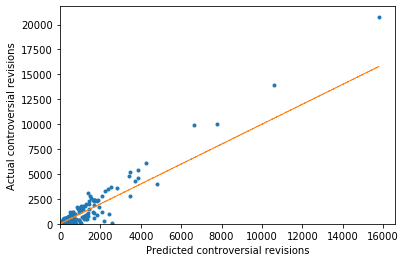

In [7]:
predicted = model.predict(X_valid)
plt.plot(predicted, y_valid,'.')
m, b = np.polyfit(predicted, y_valid, 1)
# plt.plot(predicted, m*predicted + b,'--',linewidth=1)
plt.plot(predicted, predicted,'--',linewidth=1)
plt.plot()
plt.xlabel('Predicted controversial revisions')
plt.ylabel('Actual controversial revisions')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
# plt.show()
plt.savefig('model_performance.png')
plt.show()


In [8]:
score = model.score(X_valid,y_valid)
print(score)

0.8974363371721037


In [9]:
with open('regression-model-all-data.pkl', 'wb') as fid:
    cPickle.dump(model, fid)